# Introduction:
The diabetes dataset is a binary classification problem where it needs to analyse whether a patient is suffering from the diabetes disease or not on the basis of many available features in the dataset. In this project, various machine learning algorithms are applied to predict diabetes, based on specific attributes and compared their performance measures to choose best classifier. 

* Name of dataset:	Pima Indians Diabetes
* Description:From National Institute of Diabetes and Digestive and Kidney Diseases; Includes cost data (donated by Peter Turney)
* Data types:	Multivariate
* Data task:	Classification
* Attribute types:	Integer, Real
* Instances:	768
* Variables:	9
* Year:	1990
* Area:	Life

# Contents:
* Load Dataset
* Data Preparation and Statistical Analysis:
    * Count of observation in each class
    * Descriptive Statistics
    * Handling Missing Values
	    * Data visualization and Hypothesis testing
	    * Imputing missing values
    * Data Transformation
    * Correlation between different attributes.
* Model Building and Evaluation
  * Using Hold Out Method.
  * Using K-Fold Cross Validation Method


# Load some  important libraries:

In [1]:
#load imp.libraries
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

# Load Diabetes dataset:

In [2]:
#Load data
data=pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Data Preparation and Statistical Analysis:

### Data understanding:

In [3]:
#check shape of the data
data.shape

(768, 9)

In [4]:
#see columns 
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
#data information 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


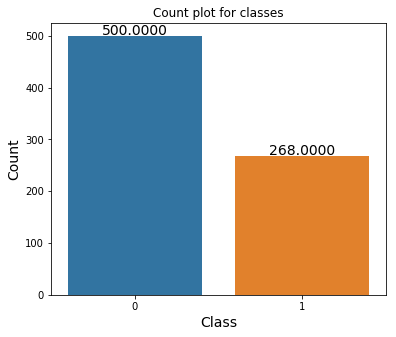

In [6]:
#Count plot for classes
plt.figure(figsize=(6,5))
axis =sns.countplot(data.Outcome)
plt.title("Count plot for classes")
plt.xlabel("Class",fontsize=14)
plt.ylabel("Count",fontsize=14)

for p in axis.patches:
    height = p.get_height()
    axis.text( p.get_x() + p.get_width()/2, height+2,'{:1.4f}'.format(height), ha="center",fontsize=14) 
    
plt.show()

Since no. of non-diabetic patients are higher than the diabetic patients ,It is imbalanced classification problem.

### Discriptive Statistics:

In [7]:
data.describe().round(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


#Above table describes count,mean,std ,minimum value, 1st quartile value , 2nd quartile value , 3rd quartile value and maximum value for each variable in data.

* Here we can see minimum value for columns "Pregnancies", "Glucose","BloodPressure","SkinThickness", "Insulin"  and "BMI" is zero.
* Woman may have zero pregnancies But PlasmaGlucose level ,BloodPressure,SkinThikness and BMI" cannot be zero.
* Also Insulin is Zero in vary rare cases .
* So First we need to check  count for zeros in these columns. 

## Count zeroes in column corresponding to each feature:

In [8]:
#count_zeroes in column corresponding to each feature.
lst=[]
cols=data.iloc[:,:-1].columns
for c in cols:
    lst.append([c,len(data.loc[data[c] == 0])])
#print(lst)
pd.DataFrame(lst,columns=["Feature","Count_of_zeros"])

,Feature,Count_of_zeros
0,Pregnancies,111
1,Glucose,5
2,BloodPressure,35
3,SkinThickness,227
4,Insulin,374
5,BMI,11
6,DiabetesPedigreeFunction,0
7,Age,0


By observing the data we can see that,
1. there are 111 counts where the value is 0 for Pregnancies.
2. there are 5 counts where the value is 0 for Glucose
3. there are 35 counts where the value is 0 for Blood pressure.
4. there are 227 counts where the value is 0 for Skin Thickness
5. there are 374 counts where the value is 0 for Insulin
6. there are 11 counts where the value is 0 for BMI

   * But PlasmaGlucose level, Bloodpressure, SkinThickness, and BMI cannot be zero.Also Insulin is zero in very very rare cases. 
   * So we treat zero values in the columns "Glucose","BloodPressure","SkinThikness","Insulin" and "BMI" as missing values.

# Distribution of each feature:

#Before making treatment for missing values we need to have an idea about the distribution of each feature.

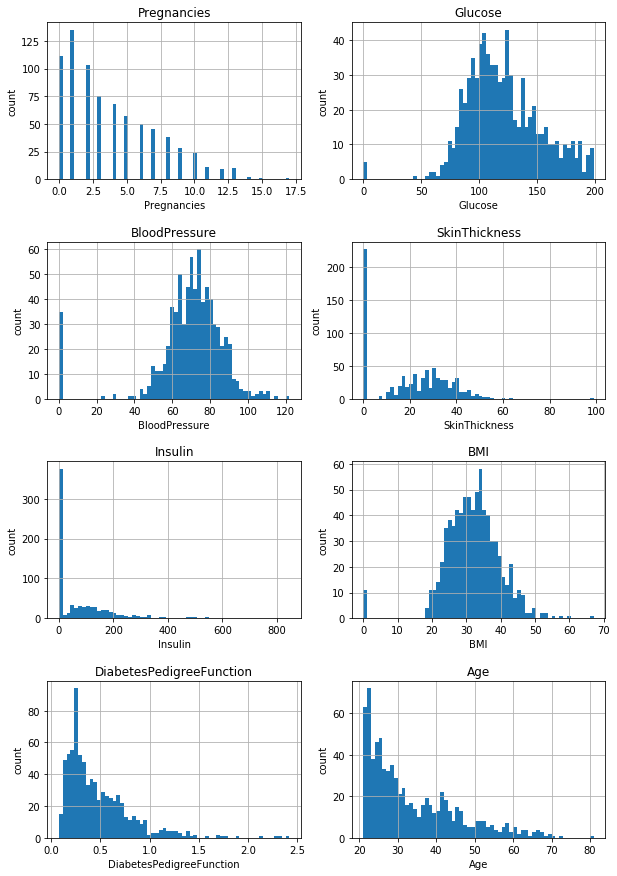

In [9]:
# Distribution plot for each feature
fig=plt.figure(figsize=(10,15))
fig.subplots_adjust(hspace=0.4,wspace=0.2)
i=0
for col in data.iloc[:,:-1].columns:
    i=i+1
    plt.subplot(4,2,i)
    data[col].hist(bins=60)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('count')   

1. Here we noticed that some instances has zero value for variables "Glucose", "BloodPressure", "SkinThikness","Insulin"and "BMI".
2. We can see variables "Glucose", "BloodPressure", "SkinThikness","Insulin","BMI" are approximate to a normal distribution


# Shapiro-Wilk test of normality:
* We can see that variable can approximate to a normal distribution. However we cannot confirm that visually.
* Hence we preform Shapiro-Wilk test of normality.
* Set up the hypothesis: H0: Variable is not normally distributed vs H1:Variable is normally distributed.

In [10]:
#Shapiro-Wilk test of normality
cols=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
alpha=0.05
from scipy.stats import shapiro
for col_name in cols:
    #testing
    stat,p=shapiro(data[col_name])
    print(col_name)
    print("Statistic= % 0.3f ,p_value=%0.3f"%(stat,p))
    #conclusion
    if p<0.05:
        print("reject null hypothesis at 5% l.o.s. i.e Variable ",col_name," is Normally Distributed at 5% l.o.s")
    else:
        print("Accept null hypothesis at 5% l.o.s. i.e Variable",col_name," is Not Normally Distributed at 5% l.os")

Glucose
Statistic=  0.970 ,p_value=0.000
reject null hypothesis at 5% l.o.s. i.e Variable  Glucose  is Normally Distributed at 5% l.o.s
BloodPressure
Statistic=  0.819 ,p_value=0.000
reject null hypothesis at 5% l.o.s. i.e Variable  BloodPressure  is Normally Distributed at 5% l.o.s
SkinThickness
Statistic=  0.905 ,p_value=0.000
reject null hypothesis at 5% l.o.s. i.e Variable  SkinThickness  is Normally Distributed at 5% l.o.s
Insulin
Statistic=  0.722 ,p_value=0.000
reject null hypothesis at 5% l.o.s. i.e Variable  Insulin  is Normally Distributed at 5% l.o.s
BMI
Statistic=  0.950 ,p_value=0.000
reject null hypothesis at 5% l.o.s. i.e Variable  BMI  is Normally Distributed at 5% l.o.s


In [11]:
#Shapiro-Wilk test of normality.
#Set up the hypothesis: H0: Variable is not normally distributed vs H1:Variable is normally distributed.

cols=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
alpha=0.05
from scipy.stats import shapiro

lst=[]
for col_name in cols:
    #testing
    stat,p=shapiro(data[col_name])
    #print("Statistic= % 0.3f ,p_value=%0.3f"%(stat,p))
    #conclusion
    if p<0.05:
        decision="Reject H0 "
        conclusion="Variable is Normally Distributed "
    else:        
        decision="Accept H0 "
        conclusion="Variable is not Normally Distributed "
    lst.append([col_name,stat,p,decision,conclusion])
    
df=pd.DataFrame(lst,columns=["Variable","Statistic","P value","Decision(at 5% l.o.s.)","Conclusion"])
df.round(3)

,Variable,Statistic,P value,Decision(at 5% l.o.s.),Conclusion
0,Glucose,0.970,0.0,Reject H0,Variable is Normally Distributed
1,BloodPressure,0.819,0.0,Reject H0,Variable is Normally Distributed
2,SkinThickness,0.905,0.0,Reject H0,Variable is Normally Distributed
3,Insulin,0.722,0.0,Reject H0,Variable is Normally Distributed
4,BMI,0.950,0.0,Reject H0,Variable is Normally Distributed


#Since attributes Glucose , BloodPressure ,Skin Thickness, Insulin ,BMI , DiabetesPedigreeFunction , Age are normally distributed 
we can replace missing values by mean , But we also have to check for presence of outliers because mean value can be affected by outliers.
If outliers are present then we try to replace missing values by median instead of mean. Bcz Median value is not affected by outliers.

In [12]:
# zero replaced by np.NaN to convineintly handle the missing values.
cols=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
data[cols]=data[cols].replace(0,np.NaN)

In [13]:
#check
#data.isnull().any()
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

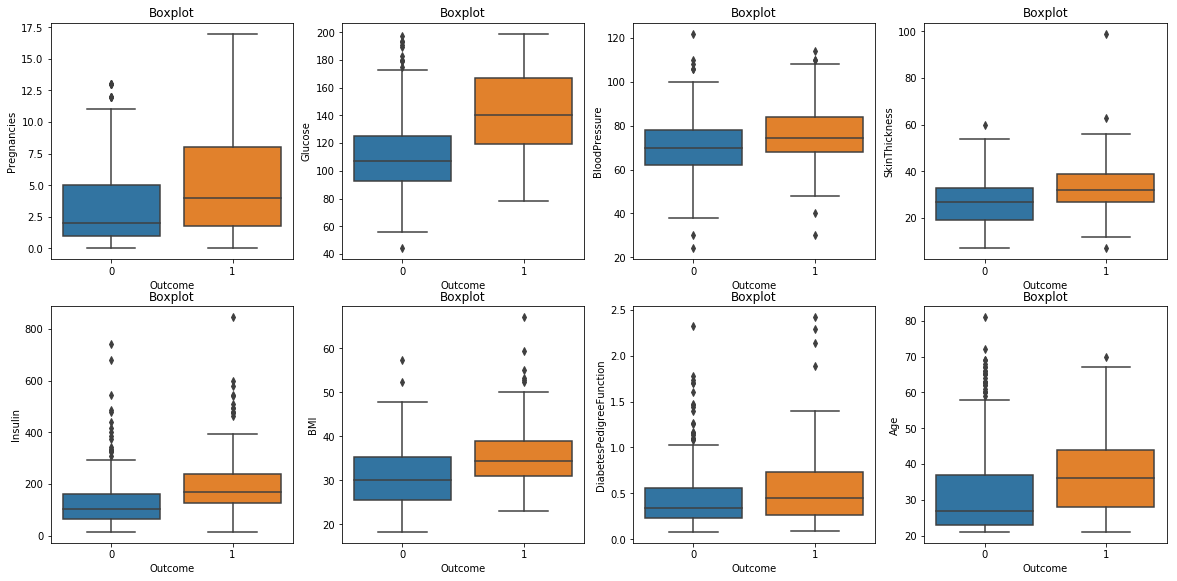

In [14]:
#Boxplots
plt.figure(figsize=(20,20))
plt.title("Visualization of class-oriented distribution of each feature using boxplot")
for column_index, column in enumerate(data.columns):
    if column == 'Outcome':
        continue
    plt.subplot(4, 4, column_index + 1)
    plt.title("Boxplot")
    sns.boxplot(x='Outcome', y=column, data=data)

* From the boxplot for each feature , we can see outliers are present for each attribute. 
* Specially,  Glucose, Insulin, BMI and Age  these features have high median values with respect to class 1 as compared to their median values for class 0.
* Classwise median value for each attribute is different . But to confirm it we need to conduct Mann Whitney U test.

In [15]:
#Classwise median for each independent variable.
lst=[]
for attribute in data.iloc[:,:-1].columns:
    d0=data.loc[data["Outcome"] == 0].loc[data[attribute].notnull()]
    d1=data.loc[data["Outcome"] == 1].loc[data[attribute].notnull()]
    #print(attribute,np.median(d0[attribute]),np.median(d1[attribute]))
    lst.append([attribute,np.median(d0[attribute]),np.median(d1[attribute])])
pd.DataFrame(lst,columns=["Feature","Median for Nondiabetic","Median for diabetic"])

,Feature,Median for Nondiabetic,Median for diabetic
0,Pregnancies,2.000,4.000
1,Glucose,107.000,140.000
2,BloodPressure,70.000,74.500
3,SkinThickness,27.000,32.000
4,Insulin,102.500,169.500
5,BMI,30.100,34.300
6,DiabetesPedigreeFunction,0.336,0.449
7,Age,27.000,36.000


###  Mann-Whitney U Test,
Tests whether the distributions of two independent samples are equal or not.

Assumptions
* Observations in each class for a attribute are independent and identically distributed (iid).
* Observations in each class for a attribute can be ranked.

Hypothesis
* H0: the distributions of both samples are equal.
* H1: the distributions of both samples are not equal.


In [16]:
# Mann-Whitney U Test
lst=[]
for attribute in data.iloc[:,:-1].columns:
    #data preparation for test
    d0=data.loc[data["Outcome"] == 0].loc[data[attribute].notnull()]
    d1=data.loc[data["Outcome"] == 1].loc[data[attribute].notnull()]
    data0 =d0[attribute]
    data1 = d1[attribute]
    #n1,n2=len(data0),len(data1) ;print(n1,n2)
    # Mann-Whitney U Test
    from scipy.stats import mannwhitneyu
    stat, p = mannwhitneyu(data0, data1)
    #print('stat=%.3f, p=%.3f' % (stat, p))
    #conclusion
    if p > 0.05:
        decision="Accept H0 "
        conclusion='Probably the same distribution for both classes'
    else:
        decision="Reject H0 "
        conclusion='Probably different distribution for both classes'
        
    lst.append([attribute,'%.3f'%stat,'%.3f'%p,decision,conclusion])  
df=pd.DataFrame(lst,columns=["Variable","Statistic","P value","Decision(at5% l.o.s.)","Conclusion"]) ;df
#df.round(3)

,Variable,Statistic,P value,Decision(at5% l.o.s.),Conclusion
0,Pregnancies,50985.000,0.000,Reject H0,Probably different distribution for both classes
1,Glucose,27393.500,0.000,Reject H0,Probably different distribution for both classes
2,BloodPressure,47566.500,0.000,Reject H0,Probably different distribution for both classes
3,SkinThickness,21930.000,0.000,Reject H0,Probably different distribution for both classes
4,Insulin,9210.500,0.000,Reject H0,Probably different distribution for both classes
5,BMI,40875.000,0.000,Reject H0,Probably different distribution for both classes
6,DiabetesPedigreeFunction,52769.000,0.000,Reject H0,Probably different distribution for both classes
7,Age,41950.000,0.000,Reject H0,Probably different distribution for both classes


Conclusion: Class oriented medians are different for each feature. So, we are going to replace missing values by  class-oriented median value for corresponding feature.

### Handling Missing Values
We imputed missing value using class-oriented median values for each feature. 

In [17]:
##fill missing values by  class-oriented median value for corresponding feature
cols=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for attribute in cols:
    d0=data.loc[data["Outcome"] == 0].loc[data[attribute].notnull()]
    d1=data.loc[data["Outcome"] == 1].loc[data[attribute].notnull()]
    
    data.loc[(data.Outcome==0)&(data[attribute].isnull()),attribute]=np.median(d0[attribute])
    data.loc[(data.Outcome==1)&(data[attribute].isnull()),attribute]=np.median(d1[attribute])
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [18]:
#check
data.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

### Correlation
To check Multicollinearity

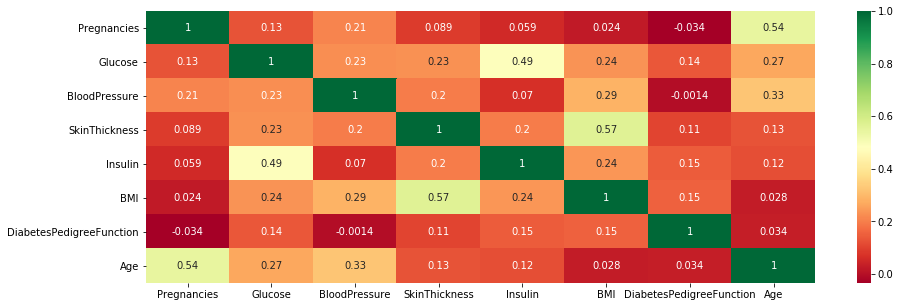

In [19]:
## Correlation
X=data.iloc[:,:-1]
import seaborn as sns
import matplotlib.pyplot as plt
#plot heat map
plt.figure(figsize=(15,5))
hm=sns.heatmap(X.corr(),annot=True,cmap="RdYlGn")

* There is no obvious correlation between the attributes. .i.e. no multicollinearity. 

### StandardScaler
* We standardize the Feature columns to bring them on same scale. 

In [20]:
X=data.iloc[:,:-1]
from sklearn.preprocessing import StandardScaler
sc_data=StandardScaler().fit_transform(X)
X=pd.DataFrame(sc_data, columns=X.columns,index=X.index)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.864625,-0.032180,0.665181,0.311604,0.169483,0.468492,1.425995
1,-0.844885,-1.204727,-0.528124,-0.010112,-0.440843,-0.848549,-0.365061,-0.190672
2,1.233880,2.014265,-0.693438,0.327535,0.311604,-1.328478,0.604397,-0.105584
3,-0.844885,-1.073339,-0.528124,-0.685405,-0.536303,-0.630399,-0.920763,-1.041549
4,-1.141852,0.503310,-2.677212,0.665181,0.294758,1.551096,5.484909,-0.020496


In [21]:
#feature 
X=X
#target
y=data.iloc[:,-1]
X.shape, y.shape

((768, 8), (768,))

# 1.Holdout Method 
To train different models we use Hold out method in which we split the data into 2 parts i.e. training data and testing data. 70% of the data is used to train the model and remaining 30% data is used to test the model.

### Train Test Split

In [22]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10)

### Balance the training data using oversampling technique.

In [23]:
#concatenate our training data back together
import pandas as pd
Train=pd.concat([X_train,y_train],axis=1)
Train.head(4)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
491,-0.547919,-1.073339,1.455650,0.102437,-0.440843,0.154939,-0.543248,0.745293,0
69,0.046014,0.798931,1.042364,-0.235210,-0.468919,-0.514053,-0.854320,-0.531023,0
667,1.827813,-0.350709,-0.197495,-0.235210,0.311604,-0.717659,-0.999286,0.575118,1
566,-0.844885,-0.744871,-0.032180,0.102437,-1.389825,0.896648,-0.180834,-1.041549,0


0    356
1    181
Name: Outcome, dtype: int64


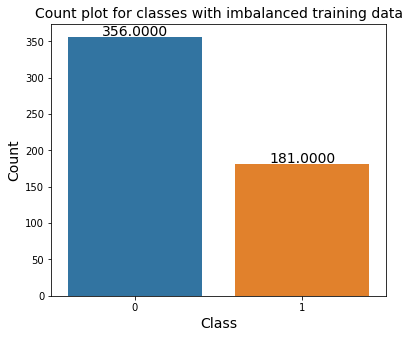

In [24]:
#count target values of training data
print(Train.Outcome.value_counts())
#countplot
fig=plt.figure(figsize=(6,5))
axis=sns.countplot(Train.Outcome)
plt.title("Count plot for classes with imbalanced training data",fontsize=14)
plt.xlabel("Class",fontsize=14)
plt.ylabel("Count",fontsize=14)

for p in axis.patches:
    height = p.get_height()
    axis.text( p.get_x() + p.get_width()/2, height+2,'{:1.4f}'.format(height), ha="center",fontsize=14) 
plt.show()

In [25]:
#Seperate minority and majority classes
false=Train[Train.Outcome==0]
true=Train[Train.Outcome==1]

print(false.Outcome.value_counts())
print(true.Outcome.value_counts())

0    356
Name: Outcome, dtype: int64
1    181
Name: Outcome, dtype: int64


In [26]:
#upsampled minority
from  sklearn.utils import resample 

true_upsampled=resample(true,
                        replace=True, #sample with replacement
                        n_samples=len(false),# match no in majority
                        random_state=10)

In [27]:
upsampled=pd.concat([true_upsampled,false])
upsampled.Outcome.value_counts()

1    356
0    356
Name: Outcome, dtype: int64

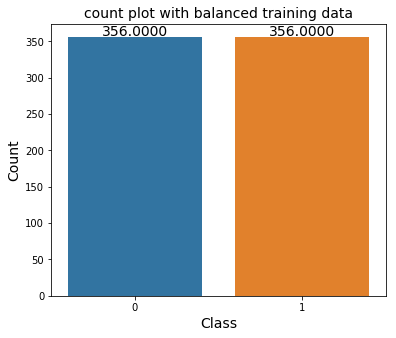

In [28]:
#Visualization of balanced count of target values
fig=plt.figure(figsize=(6,5))
axis=sns.countplot(upsampled.Outcome)
plt.title("count plot with balanced training data",fontsize=14)
plt.xlabel("Class",fontsize=14)
plt.ylabel("Count",fontsize=14)


for p in axis.patches:
    height = p.get_height()
    axis.text( p.get_x() + p.get_width()/2, height+2,'{:1.4f}'.format(height), ha="center",fontsize=14) 
plt.show()


In [29]:
# Seperate Feature and target from balanced training data
X_train=upsampled.drop('Outcome',axis=1)
y_train=upsampled.Outcome

### Build the models on training data and evaluate it using test data

In [30]:
#Required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

#For model evaluation
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score,jaccard_similarity_score
from sklearn.model_selection import cross_val_score

C:\Users\Babar\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [31]:
#logisticRegression 
#model
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(random_state=10).fit(X_train, y_train.ravel())
#predict
prediction=model.predict(X_test)

#Evaluation of model
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report
#accuracy
print('training accuracy score :%.4f'%accuracy_score(y_train.ravel(),model.predict(X_train)))
print('testing accuracy score:%.4f' %accuracy_score(prediction,y_test))

#confusion_matrix
print("confusion matrix :")
print(confusion_matrix(y_test,prediction))
#classification report
print("classification report :")
print(classification_report(y_test,prediction))


training accuracy score :0.7767
testing accuracy score:0.7792
confusion matrix :
[[111  33]
 [ 18  69]]
classification report :
             precision    recall  f1-score   support

          0       0.86      0.77      0.81       144
          1       0.68      0.79      0.73        87

avg / total       0.79      0.78      0.78       231



In [32]:
#Decision tree
#model
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=10,criterion='entropy').fit(X_train, y_train.ravel())
#predict
prediction=model.predict(X_test)

#Evaluation of model
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
#accuracy
print('training accuracy score :%.4f'%accuracy_score(y_train.ravel(),model.predict(X_train)))
print('testing accuracy score:%.4f' %accuracy_score(prediction,y_test))

#confusion_matrix
print("confusion_matrix :")
print(confusion_matrix(y_test,prediction))
#classification report
print("classification_report :")
print(classification_report(y_test,prediction))

training accuracy score :1.0000
testing accuracy score:0.8312
confusion_matrix :
[[127  17]
 [ 22  65]]
classification_report :
             precision    recall  f1-score   support

          0       0.85      0.88      0.87       144
          1       0.79      0.75      0.77        87

avg / total       0.83      0.83      0.83       231



In [33]:
#For KNN : Programme to find value of "n_neighbors"  for which accuracy is high
lst=[]
for i in range(1,21):
    from sklearn.neighbors import KNeighborsClassifier
    model=KNeighborsClassifier(n_neighbors=i,p=2, metric='minkowski').fit(X_train,y_train.ravel())
    #predict the responce for test dataset
    prediction=model.predict(X_test)
    #Model Evaluation
    from sklearn.metrics import accuracy_score
    accuracy =accuracy_score(y_test.ravel(),prediction.ravel())
    lst.append(accuracy)
k=np.array(lst).argmax()+1
print("Best_k:",k)

Best_k: 15


In [34]:
#KNN
model=KNeighborsClassifier(n_neighbors=k,p=2, metric='minkowski').fit(X_train,y_train.ravel())
#predict
prediction=model.predict(X_test)

#Evaluation of model
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
#accuracy
print('training accuracy score :%.4f'%accuracy_score(y_train.ravel(),model.predict(X_train)))
print('testing accuracy score:%.4f' %accuracy_score(prediction,y_test))
#confusion_matrix
print("confusion_matrix :")
print(confusion_matrix(y_test,prediction))
#classification report
print("classification_report :")
print(classification_report(y_test,prediction))

training accuracy score :0.8385
testing accuracy score:0.8052
confusion_matrix :
[[114  30]
 [ 15  72]]
classification_report :
             precision    recall  f1-score   support

          0       0.88      0.79      0.84       144
          1       0.71      0.83      0.76        87

avg / total       0.82      0.81      0.81       231



In [35]:
#GaussianNB
from sklearn.naive_bayes import GaussianNB
model=GaussianNB().fit(X_train, y_train.ravel())
#predict
prediction=model.predict(X_test)

#Evaluation of model
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
#accuracy
print('training accuracy score :%.4f'%accuracy_score(y_train.ravel(),model.predict(X_train)))
print('testing accuracy score:%.4f' %accuracy_score(prediction,y_test))
#confusion_matrix
print("confusion_matrix :")
print(confusion_matrix(y_test,prediction))
#classification report
print("classification_report :")
print(classification_report(y_test,prediction))

training accuracy score :0.7303
testing accuracy score:0.7532
confusion_matrix :
[[114  30]
 [ 27  60]]
classification_report :
             precision    recall  f1-score   support

          0       0.81      0.79      0.80       144
          1       0.67      0.69      0.68        87

avg / total       0.76      0.75      0.75       231



In [36]:
#SVC
from sklearn.svm import SVC
model=SVC(kernel="linear", probability=True, random_state=10).fit(X_train, y_train.ravel())
#predict
prediction=model.predict(X_test)

#Evaluation of model
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
#accuracy
print('training accuracy score :%.4f'%accuracy_score(y_train.ravel(),model.predict(X_train)))
print('testing accuracy score:%.4f' %accuracy_score(prediction,y_test))

#confusion_matrix
print("confusion_matrix :")
print(confusion_matrix(y_test,prediction))
#classification report
print("classification_report :")
print(classification_report(y_test,prediction))

training accuracy score :0.8287
testing accuracy score:0.8139
confusion_matrix :
[[114  30]
 [ 13  74]]
classification_report :
             precision    recall  f1-score   support

          0       0.90      0.79      0.84       144
          1       0.71      0.85      0.77        87

avg / total       0.83      0.81      0.82       231



In [37]:
## Bagging model of Decision trees
#base_model
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy')   

#Bagging_model
from sklearn.ensemble import BaggingClassifier
model= BaggingClassifier(base_estimator=model, n_estimators=100, random_state=10).fit(X_train, y_train.ravel())
#predict
prediction=model.predict(X_test)

#Evaluation of model"
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
#accuracy
print('training accuracy score :%.4f'%accuracy_score(y_train.ravel(),model.predict(X_train)))
print('testing accuracy score:%.4f' %accuracy_score(prediction,y_test))

#confusion_matrix
print("confusion_matrix :")
print(confusion_matrix(y_test,prediction))
#classification report
print("classification_report :")
print(classification_report(y_test,prediction))

training accuracy score :1.0000
testing accuracy score:0.8701
confusion_matrix :
[[128  16]
 [ 14  73]]
classification_report :
             precision    recall  f1-score   support

          0       0.90      0.89      0.90       144
          1       0.82      0.84      0.83        87

avg / total       0.87      0.87      0.87       231



In [38]:
#RandomForest Classifier
model=RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=10).fit(X_train, y_train.ravel())    
#model=RandomForestClassifier(n_estimators=100,random_state=10).fit(X_train, y_train.ravel())
#predict
prediction=model.predict(X_test)

#Evaluation of model
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
#accuracy
print('training accuracy score :%.4f'%accuracy_score(y_train.ravel(),model.predict(X_train)))
print('testing accuracy score:%.4f' %accuracy_score(prediction,y_test))
#confusion_matrix
print("confusion_matrix :")
print(confusion_matrix(y_test,prediction))
#classification report
print("classification_report :")
print(classification_report(y_test,prediction))

training accuracy score :1.0000
testing accuracy score:0.8658
confusion_matrix :
[[129  15]
 [ 16  71]]
classification_report :
             precision    recall  f1-score   support

          0       0.89      0.90      0.89       144
          1       0.83      0.82      0.82        87

avg / total       0.87      0.87      0.87       231



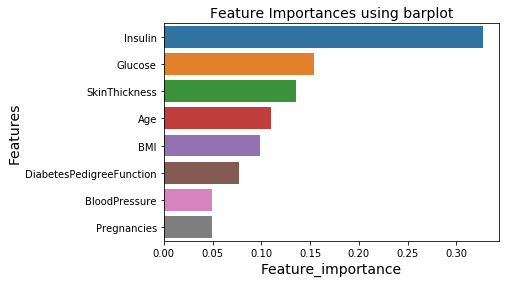

,Feature importance (in %)
Insulin,32.69
Glucose,15.37
SkinThickness,13.50
Age,10.96
BMI,9.90
DiabetesPedigreeFunction,7.72
BloodPressure,4.93
Pregnancies,4.93


In [39]:
#feature_importances
feature_imp=pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False) 

sns.barplot(x=feature_imp,y=feature_imp.index)
plt.title("Feature Importances using barplot",fontsize=14)
plt.xlabel("Feature_importance",fontsize=14)
plt.ylabel("Features",fontsize=14)
plt.show()

pd.DataFrame(feature_imp*100 , columns=["Feature importance (in %)"]).round(2)

In [40]:
#GradientBoostingClassifier
model=GradientBoostingClassifier(random_state=10).fit(X_train, y_train.ravel())
#predict
prediction=model.predict(X_test)

#Evaluation of model
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
#accuracy
print('training accuracy score :%.4f'%accuracy_score(y_train.ravel(),model.predict(X_train)))
print('testing accuracy score:%.4f' %accuracy_score(prediction,y_test))
#confusion_matrix
print("confusion_matrix :")
print(confusion_matrix(y_test,prediction))
#classification report
print("classification_report :")
print(classification_report(y_test,prediction))

training accuracy score :0.9902
testing accuracy score:0.8658
confusion_matrix :
[[127  17]
 [ 14  73]]
classification_report :
             precision    recall  f1-score   support

          0       0.90      0.88      0.89       144
          1       0.81      0.84      0.82        87

avg / total       0.87      0.87      0.87       231



### Making final report table for all algorithms (Using HoldOut Method.)

In [41]:
#For KNN : Programme to find value of "n_neighbors"  for which accuracy is high
lst=[]
for i in range(1,21):
    from sklearn.neighbors import KNeighborsClassifier
    model=KNeighborsClassifier(n_neighbors=i,p=2, metric='minkowski').fit(X_train,y_train.ravel())
    #predict the responce for test dataset
    prediction=model.predict(X_test)
    #Model Evaluation
    from sklearn.metrics import accuracy_score
    accuracy =accuracy_score(y_test.ravel(),prediction.ravel())
    lst.append(accuracy)
k=np.array(lst).argmax()+1
print("Best_k:",k)

Best_k: 15


In [42]:
#Appending all different machine learning models in a single list.
models = []
models.append(('LR', LogisticRegression(random_state=10)))
models.append(('DT', DecisionTreeClassifier(criterion='entropy',random_state=10)))
models.append(('KNN', KNeighborsClassifier(n_neighbors=k,p=2, metric='minkowski')))
models.append(('GNB', GaussianNB()))
models.append(('SVC', SVC(kernel="linear", probability=True, random_state=10)))
#ensemble_learning_techniques
models.append(("BC",(BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy') , n_estimators=100, random_state=10))))
models.append(('RF', RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=10)))
models.append(('GB', GradientBoostingClassifier(random_state=10)))

In [46]:
#Libraries
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score, roc_auc_score

#Define a function to bulid  and evaluate the model
#Empty dataframe
METRICS=pd.DataFrame(index=[],columns=[])
def ML1(name,model):
    #Hold_out method:
    #print(name)
    model=model.fit(X_train,y_train)
    prediction=model.predict(X_test)
    #print(confusion_matrix(y_test,prediction)) 
    TN,FP,FN,TP=confusion_matrix(y_test,prediction).ravel()
    #for final comparison
    METRICS.loc[name,'training_acc']=accuracy_score(y_train.ravel(),model.predict(X_train))
    METRICS.loc[name,'testing_acc']=accuracy_score(y_test.ravel(),prediction)
    METRICS.loc[name,'precision']=precision_score(y_test.ravel(),prediction)
    METRICS.loc[name,'recall']=recall_score(y_test.ravel(),prediction)
    METRICS.loc[name,"f1_score"]=f1_score(y_test.ravel(),prediction)
    METRICS.loc[name,'Sensitivity']=TP/(TP+FN)
    METRICS.loc[name,'Specificity']=TN/(TN+FP)
    METRICS.loc[name,'roc_auc_score']=roc_auc_score(y_test,prediction)

### Report table 

In [48]:
for (name,model) in models:
    ML1(name,model) 
dframe1=100*METRICS
dframe1.round(2)

,training_acc,testing_acc,precision,recall,f1_score,Sensitivity,Specificity,roc_auc_score
LR,77.67,77.92,67.65,79.31,73.02,79.31,77.08,78.20
DT,100.00,83.12,79.27,74.71,76.92,74.71,88.19,81.45
KNN,83.85,80.52,70.59,82.76,76.19,82.76,79.17,80.96
GNB,73.03,75.32,66.67,68.97,67.80,68.97,79.17,74.07
SVC,82.87,81.39,71.15,85.06,77.49,85.06,79.17,82.11
BC,100.00,87.01,82.02,83.91,82.95,83.91,88.89,86.40
RF,100.00,86.58,82.56,81.61,82.08,81.61,89.58,85.60
GB,99.02,86.58,81.11,83.91,82.49,83.91,88.19,86.05


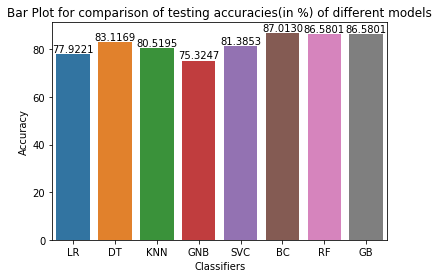

In [49]:
#We can plot the testing accuracy scores  using seaborn
x_var = dframe1.index
y_var = dframe1.iloc[:,1]  #testing_acc

plt.figure(figsize=(6,4))
import seaborn as sns
axis = sns.barplot(x_var,y_var)
axis.set(xlabel='Classifiers', ylabel='Accuracy')
axis.set_title("Bar Plot for comparison of testing accuracies(in %) of different models")

for p in axis.patches:
    height = p.get_height()
    axis.text( p.get_x() + p.get_width()/2, height+0.8,'{:1.4f}'.format(height), ha="center") 
    
plt.show()

From the above table and barplot  we can easily identify that  accuracy score on the test data for BaggingClassifier is 87.01% & higher than the accuracy scores provided by all other classifiers. But RandomForest and GradientBoostingClassifier 
also provides good accuracy scores i.e 86.58% and 86.58 % respectively.

#But sometimes choosing a best model using only accuracy scores on test data will mislead us, because there may be a chance of more False positives or more False negatives during the classification by model.
So we should also think about recall,precision, f1_score , sensitivity and specificity for each of the model .
Also, It is important to check discriminating power for each model so we find ROC_acc_scores also.

Findings: ,
* According to the training accuracy scores-  
   * DT, and Ensemble learning techniques  BC,RF and GB has good training accuracies 100%,100%,100% & 99.01% respectively. It means these are the models which are more suitable to use among all.

* Now according to testing  accuracy scores- 
  * DT, and Ensemble learning techniques  BC,RF and GB has good testing accuracies 83.11%,87.01%,86.58% & 86.58% respectively.
  * Also KNN and SVC provides accuracies on testing data above 80% (i.e 80.51% and  81.38% resp.)

* Now according to precision scores- 
  * Ensemble learning techniques  RF ,BC and GB has good precision scores 82.55%,82.02% , & 81.11% respectively.And precision for all other algoriths is below 80%. False positives are less for these models.
  
  * But we should also have very low number of  False negatives  So we cannot decide only from precision scores because if only False positives are less & True positives are high  for a model then  it will provide high precision . So we must have to think about both precision and recall scores.

* Now according to recall scores- 
  * SupportVectorClassifier has high recall value i.e 85.05% . It means False negatives are less for SVC.But note that pr 
  * then BC , GF and RF has good recall scores 83.90% , 83.90% and 81.60% respectively.
  * Here also we can't decide best model using only recall score because here may be chance of getting higher no.s of False Positives . So we must have to think about both precision and recall scores , which is decided by f1_score.
  
* Now according to f1 scores- 
  * Ensemble learning techniques  BC ,GB  and RF has high f1 scores 82.95%,82.48% , & 82.08% respectively among all other algorithms. But f1 scores for Ensemble learning techniques  BC , GF and RF are approximately equal i.e approximately 82%

* So we have to check discriminating power for the trained models using ROC  curve  in which we get  area under the curve
  which is measured by ROC accuracy score.
   * Ensemble learning techniques  BC ,GB  and RF has high ROC accuracy scores 86.39% ,86.05%,85.59% 
*  So from Hold out method we choose Bagging Classifier as a Best Classifier.

In [50]:
#ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
def plot_roc_curve(name,model):  
    model=model
    model.fit(X_train,y_train)
    prediction=model.predict(X_test)
    roc_auc=roc_auc_score(y_test,prediction)
    fpr,tpr,thresholds= roc_curve(y_test,model.predict_proba(X_test)[:,1])
    
    plt.plot(fpr,tpr,label='%s ROC(area= %0.4f)' %(name,100*roc_auc))
    plt.plot([0,1],[0,1],'r--')
   
    plt.xlim=([0,1])
    plt.ylim=([0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')

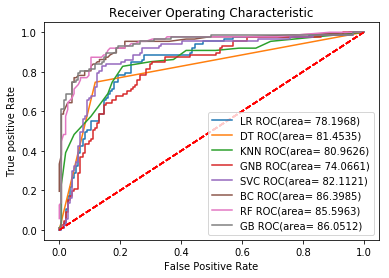

In [51]:
for (name,model) in models:
    plot_roc_curve(name,model)

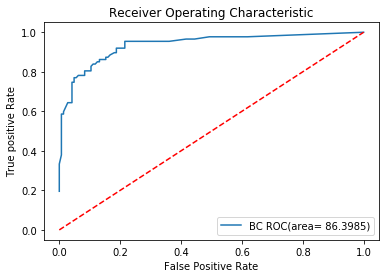

In [52]:
#plot_roc_curve('RF', RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=10))
plot_roc_curve('BC',BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy') , n_estimators=100, random_state=10))

Since discrimanating power is higher for Bagging classifier as compared to other classifiers so Bagging classifier is  choosen as best fitted model using Hold Out method.

### Therefore using Hold Out Method we choose Bagging Classifier as the best classifier

# #==========================================================# #

### 2.K-Fold Cross Validation with Scikit Learn :
We will move forward with K-Fold cross validation as it is more accurate and use the data efficiently. We will train the models using 10 fold cross validation and calculate the mean accuracy of the models.

In [53]:
#For Evaluation using KFold
from sklearn.model_selection import KFold,cross_val_score
kf=KFold(n_splits=10, random_state=10)

In [54]:
#KFold accuracy scores for each model
df=pd.DataFrame()
for (name,model) in models:    
    kfold=KFold(n_splits=10,shuffle=True, random_state=10)
    scores = cross_val_score(model, X, y.ravel(), cv=kfold, scoring='accuracy')
    df[name]=scores
df=df*100
df.round(4)

,LR,DT,KNN,GNB,SVC,BC,RF,GB
0,77.9221,92.2078,75.3247,77.9221,76.6234,89.6104,85.7143,87.0130
1,74.0260,84.4156,83.1169,77.9221,75.3247,88.3117,88.3117,88.3117
2,74.0260,83.1169,81.8182,72.7273,72.7273,84.4156,84.4156,85.7143
3,83.1169,79.2208,85.7143,80.5195,83.1169,85.7143,87.0130,83.1169
4,84.4156,87.0130,83.1169,80.5195,84.4156,94.8052,92.2078,90.9091
5,77.9221,87.0130,84.4156,77.9221,76.6234,92.2078,89.6104,92.2078
6,70.1299,83.1169,77.9221,70.1299,71.4286,87.0130,89.6104,88.3117
7,85.7143,84.4156,93.5065,85.7143,84.4156,92.2078,90.9091,92.2078
8,72.3684,89.4737,76.3158,71.0526,71.0526,90.7895,88.1579,88.1579
9,73.6842,75.0000,76.3158,71.0526,75.0000,81.5789,82.8947,82.8947


Text(0,0.5,'10-fold accuracies in % ')

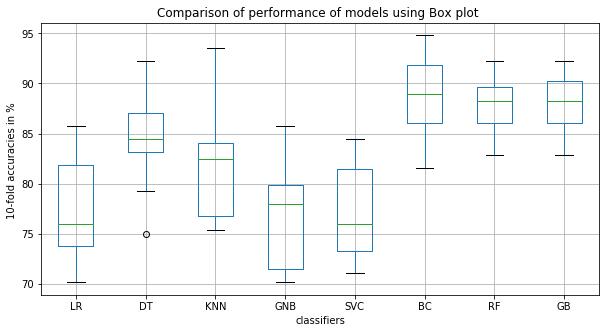

In [55]:
#Comparison of performance of models using Box plot "
df.boxplot(figsize=(10,5))
plt.title("Comparison of performance of models using Box plot ")
plt.xlabel("classifiers")
plt.ylabel("10-fold accuracies in % ")

In [56]:
#K-Fold Cross Validation
from sklearn.model_selection import KFold,cross_val_score
names = []
scores = []

kfold=KFold(n_splits=10,shuffle=True,random_state=10)
for name, model in models:
    score = cross_val_score(model, X, y.ravel(), cv=kfold, scoring='accuracy').mean()
    names.append(name)
    scores.append(100*score)  #----------score which is to be append in a list is multiplied by 100 to convert score in % 
df2 = pd.DataFrame({'Classifier': names, 'Kfold_avg_acc': scores})
df2.round(4)

,Classifier,Kfold_avg_acc
0,LR,77.3325
1,DT,84.4993
2,KNN,81.7567
3,GNB,76.5482
4,SVC,77.0728
5,BC,88.6654
6,RF,87.8845
7,GB,87.8845


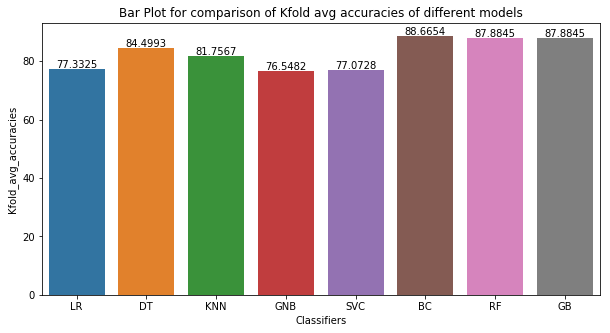

In [57]:
#We can plot the accuracy scores using seaborn
plt.figure(figsize=(10,5))
axis = sns.barplot(x = 'Classifier', y = 'Kfold_avg_acc', data = df2)
axis.set(xlabel='Classifiers', ylabel='Kfold_avg_accuracies')
axis.set_title("Bar Plot for comparison of Kfold avg accuracies of different models")
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.5, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

* From the above barplot we  can easily see that Bagging classifier has greater accuracy about 88.67%,Also  RandomForest Classifier and GradientBoosting classifier performs well with accuracy scores 87.88 % &  87.88 % respectively.
* Decision tree has 84.50% accuracy score .
* LR,KNN,GNB, and SVC has less accuracy scores.

### Therefore using KFold cross validation method, Bagging classifier choosen as a best fitted classifier for prediction of diabetes with 88.67% Kfold average accuracy 

# #=====================The End======================# #